# Grama Model Building

*Purpose*: Grama provides tools to work with models, but in order to use these tools we need to be able to buidl models in grama! This exercise will introduce fundamental concepts for building and sanity-checking models. We'll build on these skills in future exercises.


## Setup


In [1]:
import grama as gr
import numpy as np
import pandas as pd
DF = gr.Intention()

# Useful Programming Tools

To build grama models, we'll need to use a few simple programming tools.


## Lambda functions

In an earlier exercise, we learned how to define Python functions using the `def` keyword:

```python
def fcn(x):
    return x ** 2
```

However, we can define the same function with `lambda` syntax:

```python
fcn = lambda x: x ** 2
```

A `lambda` function starts with the keyword `lambda`, and is followed by its arguments. The example above has just one argument `x`. After the arguments comes a colon `:`, which signals that what follows is the output of the function.

The advantage of this `lambda` syntax is that it is more compact, and can be incorporated with a grama model building pipeline. Let's get some practice defining lambda functions.


### __q1__ Implement a `lambda` function

Use the `lambda` syntax to implement the following function:

$$f(x) = x + 1$$


In [2]:
# TASK: Create a lambda function to implement the function above
# task-begin
fcn = None
# task-end
# solution-begin
fcn = lambda x: x + 1
# solution-end

# Use the following to check your work
assert \
    fcn(1) == 2, \
    "Incorrect value"

print("Success!")

Success!


## Working with DataFrames

Grama uses DataFrames to represent data and to interface with models. The constructor `gr.df_make()` is a convenient way to make a simple DataFrame:


In [3]:
# NOTE: No need to edit; recall that gr.df_make(...)
# helps us construct DataFrames
gr.df_make(
    x=[1, 2, 3],
    y=["a", "b", "c"],
    z="recycled value",
)

,x,y,z
0,1,a,recycled value
1,2,b,recycled value
2,3,c,recycled value


We can *combine* this DataFrame constructor with a `lambda` function to take a DataFrame as an input, and return a DataFrame as an output. For instance, the following is a DataFrame version of the previous `lambda` function:

```python
fcn_df = lambda df: gr.df_make(y=df.x ** 2)
```

Note that this `lambda` function takes in a DataFrame, uses specific columns from that input `df`, and returns a DataFrame.


### __q2__ Functions on DataFrames

Use the `lambda` syntax to implement the following function:

$$y(x) = x + 1$$

Make sure your lambda function takes a DataFrame as an argument, and returns a DataFrame as an output.

In [4]:
# TASK: Create a lambda function based on DataFrames
# task-begin
fcn_df = None
# task-end
# solution-begin
fcn_df = lambda df: gr.df_make(y=df.x + 1)
# solution-end

# NOTE: Use the following to check your work
df_res = fcn_df(gr.df_make(x=[0, 1]))
df_out = gr.df_make(y=[1, 2])

assert \
    isinstance(df_res, pd.DataFrame), \
    "Output must be DataFrame"

assert \
    gr.df_equal(df_res, df_out), \
    "Incorrect output"

print("Success!")

Success!


# Constructing Grama Models

### TODO

(Reminder: Compositions)


### Add a function

### TODO

`gr.cp_vec_function()`


### __q3__ Add a function to a model

Add a function to `md_basic` that provides the output `y = x + 1`.


In [5]:
# TASK: Finish implementing the model
md_basic = (
    gr.Model("Basic model")
# solution-begin
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            y=df.x + 1
        ),
        var=["x"],
        out=["y"],
    )
# solution-end
)

# NOTE: Use the following to check your work
df_res = (
    md_basic
    >> gr.ev_df(gr.df_make(x=0))
)
df_out = gr.df_make(x=0, y=1)

assert \
    set(md_basic.var) == {"x"}, \
    "md_basic has wrong variables"
    
assert \
    set(md_basic.out) == {"y"}, \
    "md_basic has wrong outputs"

assert \
    gr.df_equal(df_res, df_out), \
    "md_basic function incorrect"
    
print("Success!")

Success!


### Add bounds

`gr.cp_bounds()`


### __q4__ Add bounds to a model

For the following model, add bounds $0 \leq x_1 \leq 1$ and $0 \leq x_2 \leq 1$.


In [6]:
# TASK: Finish implementing the model
md_bounded = (
    gr.Model("Bounded input")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            y=gr.sin(df.x1) + gr.sin(df.x2)**2
        ),
        var=["x1", "x2"],
        out=["y"],
    )
# solution-begin
    >> gr.cp_bounds(
        x1=(0, 1),
        x2=(0, 1),
    )
# solution-end
)

# NOTE: Use the following to check your work
assert \
    (md_bounded.domain.bounds["x1"][0] == 0) and \
    (md_bounded.domain.bounds["x1"][1] == 1) and \
    (md_bounded.domain.bounds["x2"][0] == 0) and \
    (md_bounded.domain.bounds["x2"][1] == 1), \
    "md_bounded bounds incorrect"
    
print("Success!")

Success!


# Checking models

### TODO


### __q5__ Create a grid of values


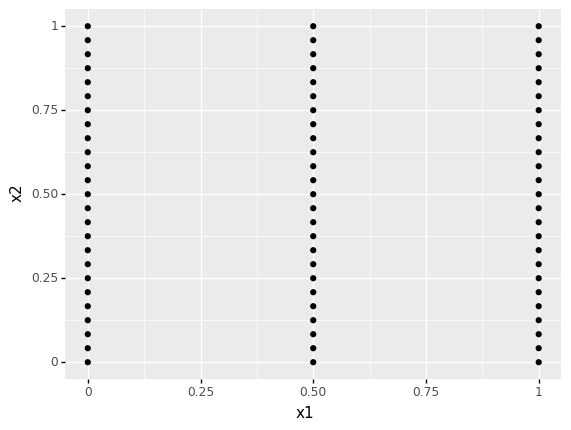

<ggplot: (8777437366013)>

In [7]:
# TASK:
(
    # TODO: Try modifying the following code; see how
    # the results change
    gr.df_grid(
        x1=[0.0, 0.5, 1.0],
        x2=np.linspace(0, 1, num=25),
    )
    
    # NOTE: No need to edit the following
    >> gr.ggplot(gr.aes("x1", "x2"))
    + gr.geom_point()
)

### __q6__ Evaluate a grid of values


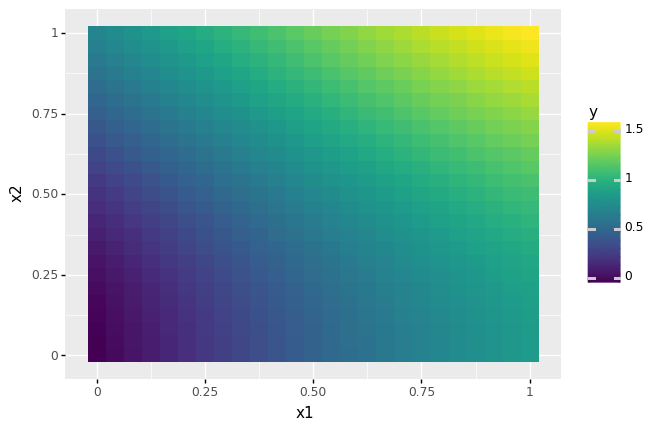

<ggplot: (8777437711990)>

In [8]:
# TASK:
(
    md_bounded
    >> gr.ev_df(
# solution-begin
        gr.df_grid(
            x1=np.linspace(0, 1, num=25),
            x2=np.linspace(0, 1, num=25),
        )
# solution-end
    )
    
    >> gr.ggplot(gr.aes("x1", "x2", fill="y"))
    + gr.geom_tile()
)

## Model sanity checks

### TODO


$$\begin{aligned}f(x, y) &= x + y^2 \,|\, x < 1/2 \\ & = 1 - x + y^2 \,|\, x \geq 1/2 \end{aligned}$$


In [9]:
# NOTE: No need to edit; you'll explore this model in the next task
md_error = (
    gr.Model("Error example")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=(df.x + df.y**2) * (df.x < 0.5)
             +(1 + df.x + df.y**2) * (df.x >= 0.5)
        ),
        var=["x", "y"],
        out=["f"],
    )
    >> gr.cp_bounds(
        x=(0, 1),
        y=(0, 1),
    )
)
md_error

model: Error example

  inputs:
    var_det:
      x: [0, 1]
      y: [0, 1]

    var_rand:

    copula:
      None

  functions:
      f0: ['x', 'y'] -> ['f']

### __q7__ Find the error

Construct a sinew plot to inspect the model behavior and find the implementation error. Make sure to sweep over all the deterministic variables in the model. Remember that the effect of `x` should switch from positive to negative at the midpoint of its domain.

*Hint*: We learned about sinew plots in the previous grama exercise `e-grama01-basics`.


Calling plot_sinew_outputs....


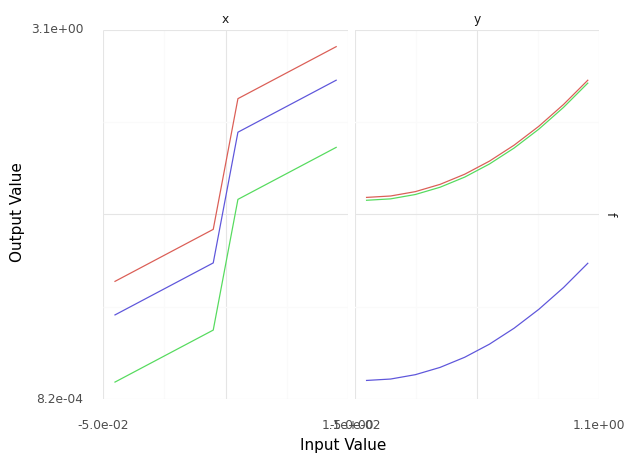

<ggplot: (8777437830970)>

In [10]:
# TASK: Explore the model's behavior to find the implementation error
(
    md_error
# task-begin
    # Perform a "sinew" evaluation
# task-end
# solution-begin
    >> gr.ev_sinews(df_det="swp")
# solution-end
    # NOTE: No need to edit; use this to visualize your results
    >> gr.pt_auto()
)

# Payoff: Rapid model exploration

One of the big payoffs from these model building tools is the ability to rapidly explore models. Since a grama model includes a lot of information (functions and bounds), the tools for evaluating and visualizing models are extremely simple.

For instance, we can re-build the model to fix the sign error on `x`, and quickly construct a sinew plot to verify that we've fixed the issue:


Calling plot_sinew_outputs....


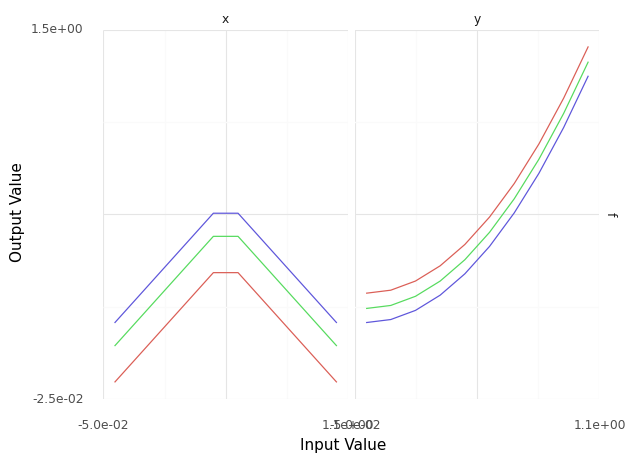

<ggplot: (8777438266621)>

In [11]:
# NOTE: No need to edit; this fixes the model
(
    # Build the model
    gr.Model("Fixed model")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=(df.x + df.y**2) * (df.x < 0.5)
             +(1 - df.x + df.y**2) * (df.x >= 0.5)
        ),
        var=["x", "y"],
        out=["f"],
    )
    >> gr.cp_bounds(x=(0, 1), y=(0, 1))
    
    # Evaluate
    >> gr.ev_sinews(df_det="swp")
    
    # Plot
    >> gr.pt_auto()
)

We'll see in the next grama exercise how to generate and visualize contour data. Once we've implemented a model, the syntax for generating a contour plot is quite simple:


Calling plot_contour....


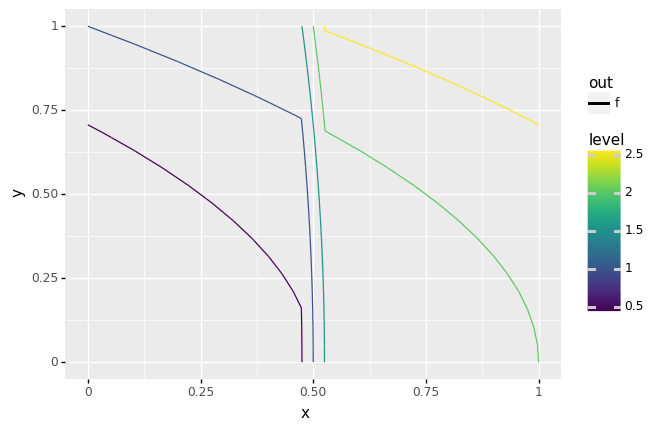

<ggplot: (8777438112775)>

In [12]:
# NOTE: No need to edit; this generates a contour plot
(
    # Select the model
    md_error
    # Evaluate
    >> gr.ev_contour(
        var=["x", "y"],
        out=["f"],
    )
    # Plot
    >> gr.pt_auto()
)